In [1]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from mpl_toolkits.basemap import Basemap

# Airplanes

- Data import
- Data inspection and cleaning
- Visualisation

## Data import

Import as pandas `dataframe` the weather report and the flights data.

In [2]:
flights_name = "../data/flights_small.csv"
# flights_name = "../data/flights_medium.csv"
# flights_name = "../data/flights_large.csv"
flights = pd.read_csv(flights_name)

In [46]:
weather_name = "../data/weather.csv"
weather = pd.read_csv(weather_name)

## Data inspection, cleaning, and augmentation

Inspect `flights` `dataframe` columns content.

In [3]:
flights

,Date,Airline,Airline_code,Arrival_airport,Arrival_state,Departure_Airport,Departure_State,Departure_actual,Departure_delay,Arrival_actual,Arrival_delay,Arrival_schedule,Departure_schedule,DC_Longitude,DC_Latitude,Longitude,Latitude,Route,Path_order
0,2003-04-05,EV,20366,SHV,LA,MOB,AL,1820,-10,2048,30,2018,1830,-88.24,30.69,-88.24,30.69,AL to LA,1
1,2006-04-10,YV,20378,CLT,NC,MGM,AL,1613,-10,1833,-9,1842,1623,-86.39,32.30,-86.39,32.30,AL to NC,1
2,2006-04-05,YV,20378,CLT,NC,MGM,AL,1615,-8,1825,-17,1842,1623,-86.39,32.30,-86.39,32.30,AL to NC,1
3,2006-01-12,YV,20378,CLT,NC,MGM,AL,1620,-3,1840,1,1839,1623,-86.39,32.30,-86.39,32.30,AL to NC,1
4,2006-01-05,YV,20378,CLT,NC,MGM,AL,1614,0,1840,10,1830,1614,-86.39,32.30,-86.39,32.30,AL to NC,1
5,2006-01-06,YV,20378,CLT,NC,MGM,AL,605,-5,820,-9,829,610,-86.39,32.30,-86.39,32.30,AL to NC,1
6,2006-04-25,YV,20378,CLT,NC,MGM,AL,1613,-10,1843,1,1842,1623,-86.39,32.30,-86.39,32.30,AL to NC,1
7,2006-04-24,YV,20378,CLT,NC,MGM,AL,1620,-3,1835,-7,1842,1623,-86.39,32.30,-86.39,32.30,AL to NC,1
8,2006-04-21,YV,20378,CLT,NC,MGM,AL,1623,0,1855,13,1842,1623,-86.39,32.30,-86.39,32.30,AL to NC,1
9,2011-04-01,XE,20374,SHV,LA,XNA,AR,2140,40,2243,53,2150,2100,-94.30,36.28,-94.30,36.28,AR to LA,1


The `flights` `dataframe` has 19 columns containing information on the flight date, operating airline (both with a two character _string_ code and a five digits _integer_ code), departure and arrival airport codes (two characters _string_), departure and arrival state codes (two characters _string_), actual and scheduled departure time (24h _integer_ format), time delay at departure in minutes (_signed integer_; this is also calculated as `Departure_actual - Departure_schedule`, therefore a negative departure time indicates that the ariplane took off before than expected), scheduled and actual arrival time (24h _integer_ format), arrival delay (_signed integer_; this can be also be calculated as `Arrival_actual - Arrival_schedule`), longitude and latitude of the departure airport (_signed float_; there are two pairs of column with this kind of data), route (_string_ departure/arrival airport codes), and the path order (_integer_).

In [ ]:
#Check if the departure location is repeated
all(flights["DC_Longitude"] == flights["Longitude"]) and all(flights["DC_Latitude"] == flights["Latitude"])

In [ ]:
#Check if the Path_order is alway equal to 1 or 2
all(flights["Path_order"]) in [1,2]

In the `medium` and `small` datasets, the `Path_order` is always `1`. This is not true for the `large` dataset.
- __Q1:__ what does `Path_order` column contain?

When the `Path_order == 2`, `DC_Longitude != Longitude`; why is that?
- __Q2:__ what is the difference between `DC_Longitude` (`DC_Latitude`) and `Longitude` (`Latitude`)?

Inspect `weather` `dataframe` content.

In [94]:
print(weather)

                Date airport  time  temperature  snow  wind
0         2006-03-14     ORD  2041           35   NaN  18.6
1         2006-09-08     SLC   807           72   NaN   6.5
2         2006-10-22     MCO  1202           81   0.0   3.1
3         2006-10-22     MCO   602           81   0.0   3.1
4         2007-07-09     MRY  1011           64   NaN   0.7
5         2006-08-01     IAH  1256           85   NaN   5.1
6         2006-01-22     MDW  1330           27   3.0   0.9
7         2007-07-04     DFW  1259           80   NaN   5.7
8         2007-07-04     DFW   930           80   NaN   5.7
9         2006-08-17     SEA   644           63   NaN   2.8
10        2006-08-17     SEA  1947           63   NaN   2.8
11        2005-06-05     MEM  1927           85   NaN   8.4
12        2005-01-19     BOS  1847           15   NaN   3.1
13        2006-04-30     BWI  1010           52   0.0   4.5
14        2007-03-14     DCA  1049           66   0.0   8.7
15        2005-05-04     DEN  1825      

There are 35M+ rows and 6 columns containing the weather report date (`YYYY-MM-DD` format), airport code (_string_), time of the day (24h _integer_ format), temperature (Farenheit degrees as _signed integer_), snow (inches?) (_float_ or `NaN`), and wind velocity magnitude (knots or m/s?).

- __Q3:__ Units for snow?
- __Q4:__ Units for wind velocity?

### Cleaning
Replace `NaN`s in the `snow` cloumn with zeroes. We assume that if there are not information about the snow, this is because there was not snow at all.

In [ ]:
weather["snow"].fillna(0.0, inplace=True)

Remove from `weather` all the rows referring to airports not in `flights`.

In [3]:
#create a list of all the airports
airports = list(set(flights["Departure_Airport"])) + list(set(flights["Arrival_airport"]))

#filter weather dataset
weather_at_airports = weather[weather['airport'].isin(airports)]

NameError: name 'weather' is not defined

Remove from `weather_at_airports` all the entries referring to dates not present in `flights`.

In [92]:
dates = list(set(flights["Date"]))
weather_at_dates = weather_at_airports[weather_at_airports["Date"].isin(dates)]

In [95]:
print(weather_at_dates)

                Date airport  time  temperature  snow  wind
0         2006-03-14     ORD  2041           35   NaN  18.6
1         2006-09-08     SLC   807           72   NaN   6.5
2         2006-10-22     MCO  1202           81   0.0   3.1
3         2006-10-22     MCO   602           81   0.0   3.1
5         2006-08-01     IAH  1256           85   NaN   5.1
6         2006-01-22     MDW  1330           27   3.0   0.9
7         2007-07-04     DFW  1259           80   NaN   5.7
8         2007-07-04     DFW   930           80   NaN   5.7
9         2006-08-17     SEA   644           63   NaN   2.8
10        2006-08-17     SEA  1947           63   NaN   2.8
11        2005-06-05     MEM  1927           85   NaN   8.4
12        2005-01-19     BOS  1847           15   NaN   3.1
13        2006-04-30     BWI  1010           52   0.0   4.5
14        2007-03-14     DCA  1049           66   0.0   8.7
15        2005-05-04     DEN  1825           53   NaN   5.4
16        2006-10-09     LAX  1800      

In [15]:
#airport locations
airports = flights.drop_duplicates(subset=["Departure_Airport"], keep='first', inplace=False)

In [5]:
airport_coordinates = {}
for index, row in airports.iterrows():
    airport_coordinates[row["Departure_Airport"]] = (row["Latitude"], row["Longitude"])

In [6]:
#routes
routes = flights.drop_duplicates(subset=["Departure_Airport", "Arrival_airport"], keep="first")

## Visualisation

In [ ]:
g = sns.factorplot(x="Airline",y="Arrival_delay", data=flights, size=12, kind="bar", palette="muted")
g.despine(left=True)

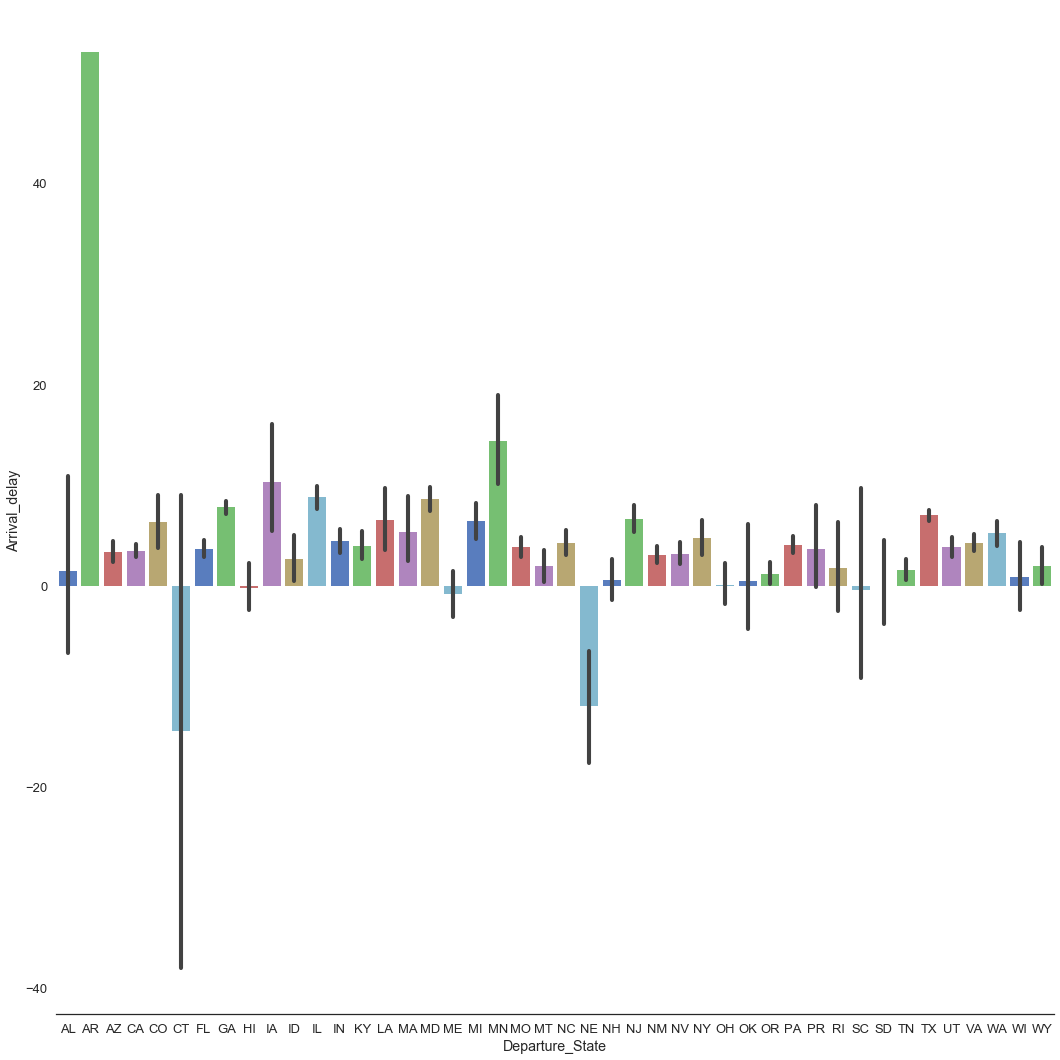

In [44]:
g = sns.factorplot(x="Departure_State",y="Arrival_delay", data=flights, size=15, kind="bar", palette="muted")
g.despine(left=True)

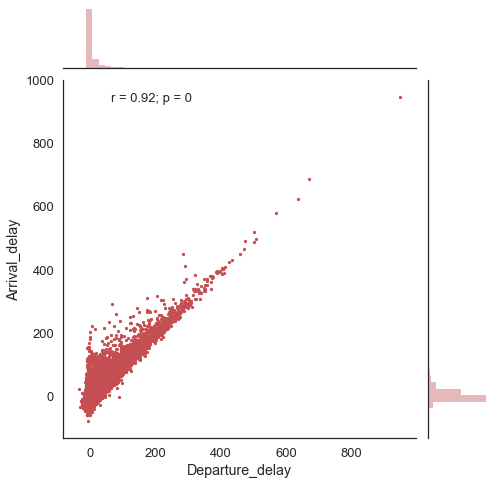

In [40]:
sns.set(style="white", color_codes=True)
sns.set_context("talk")
sns.jointplot("Departure_delay", "Arrival_delay", data=flights, color="r", size=7, s=5, linewidth=1, annot_kws=dict(stat="r"))

KeyboardInterrupt: 

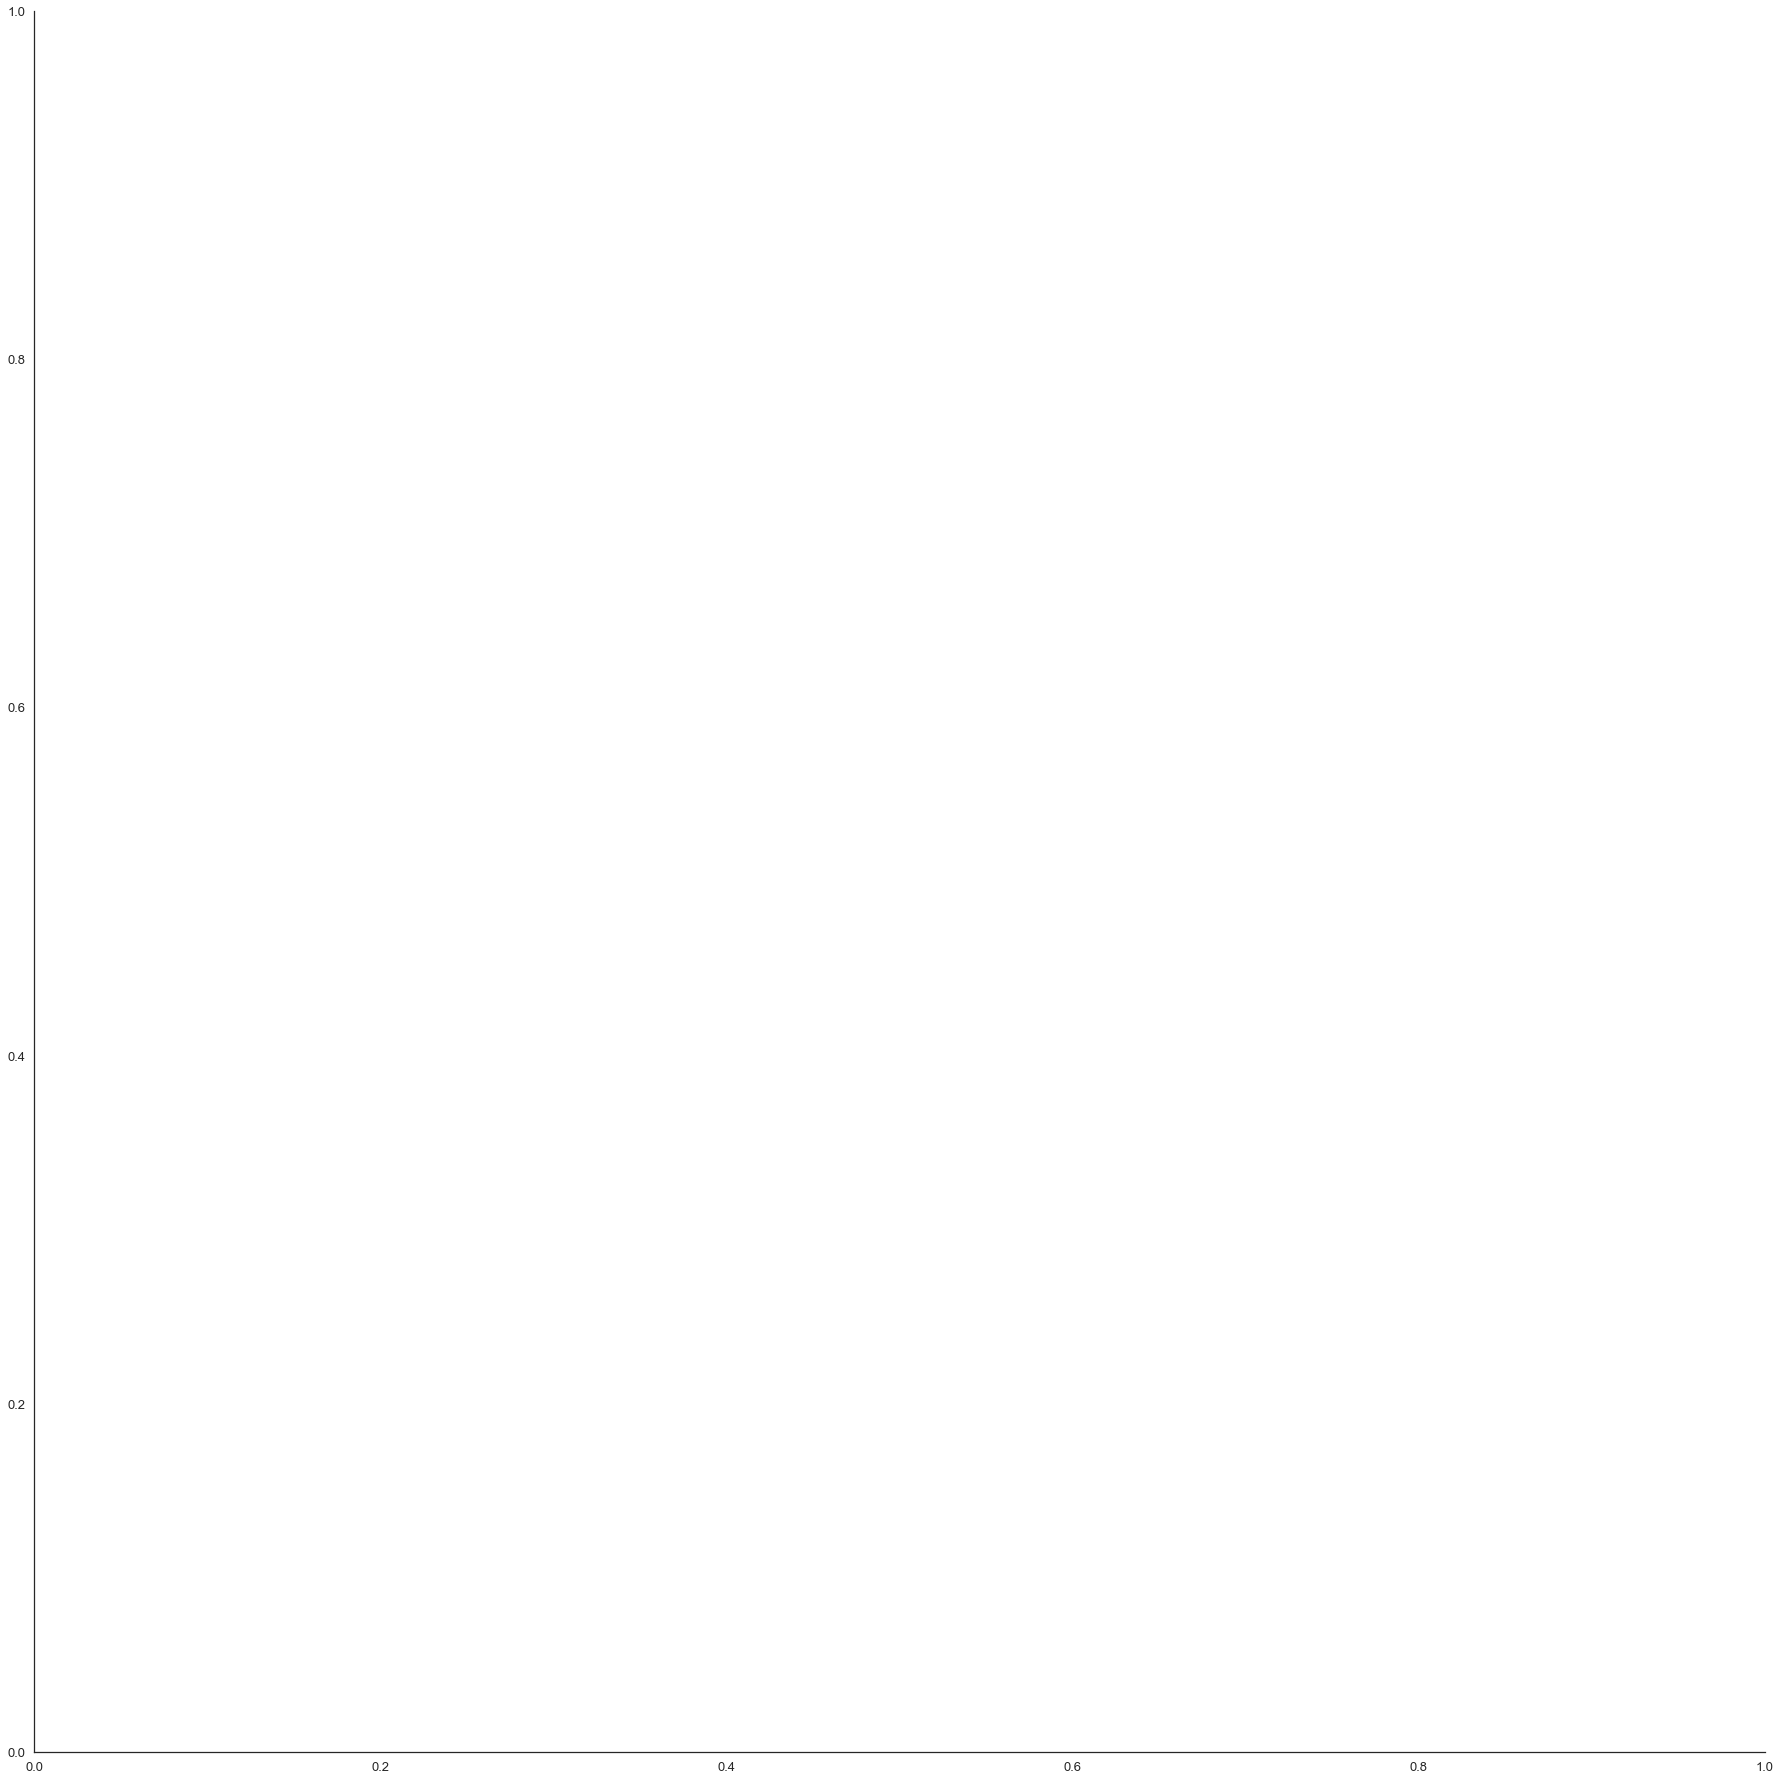

In [89]:
sns.factorplot(data=weather_at_airports, x="airport", y="wind", kind="bar", size=25)

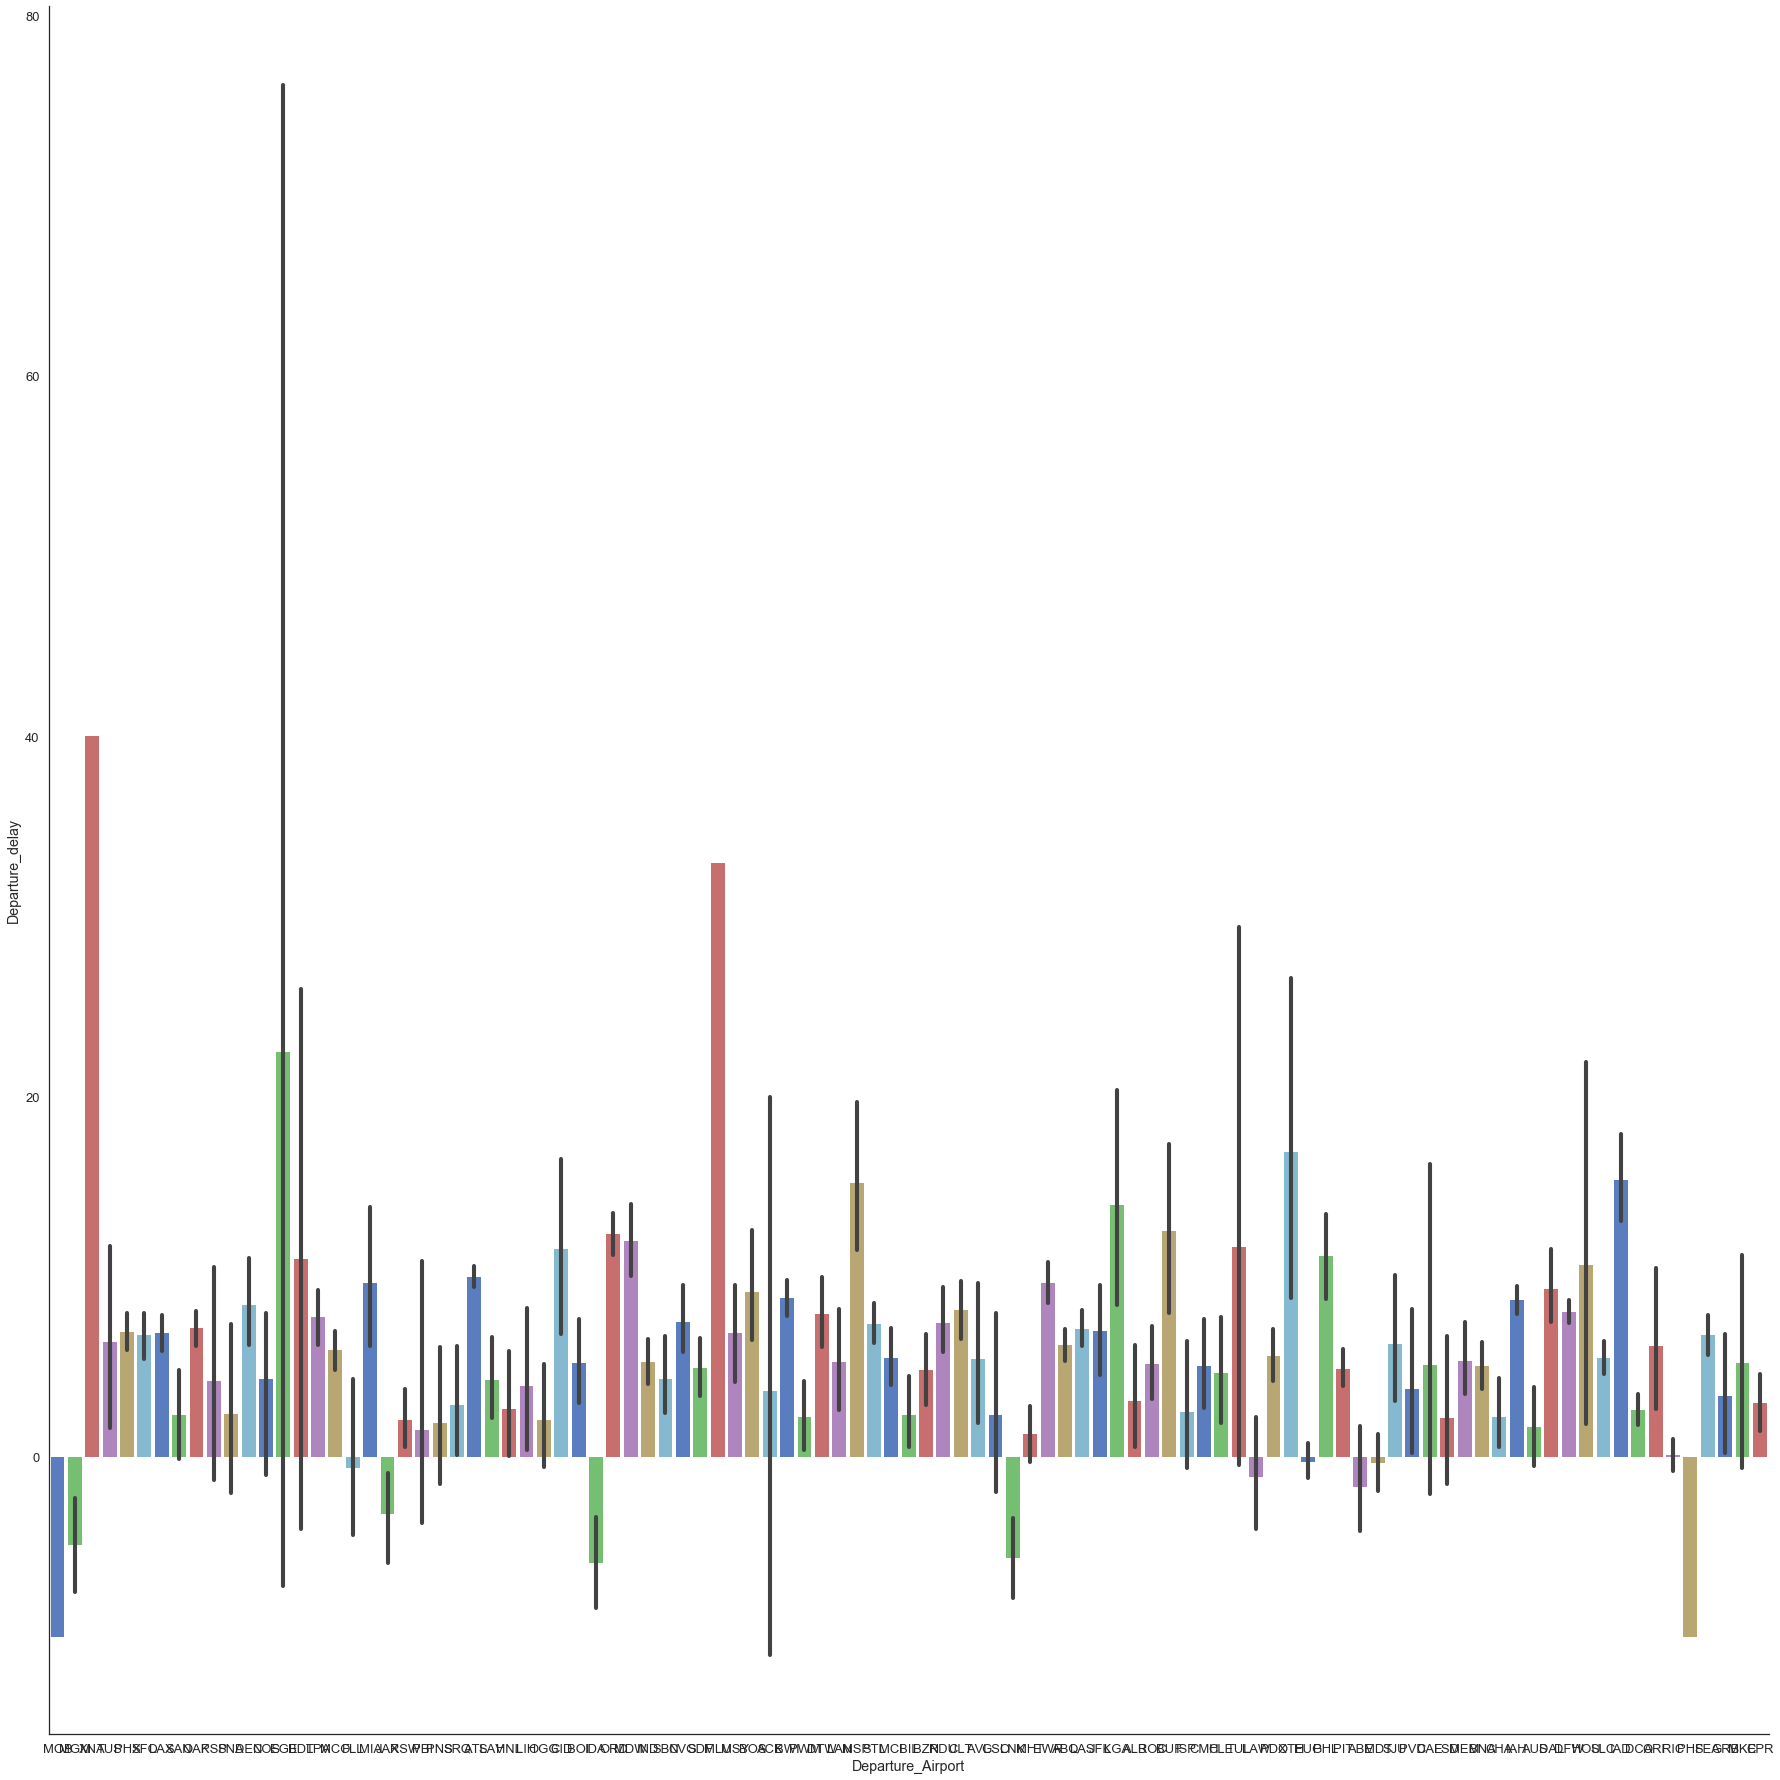

In [68]:
sns.factorplot(x="Departure_Airport",y="Departure_delay", data=flights, size=25, kind="bar", palette="muted")

First, visualise the US map, the airport locations, and the flight routes.

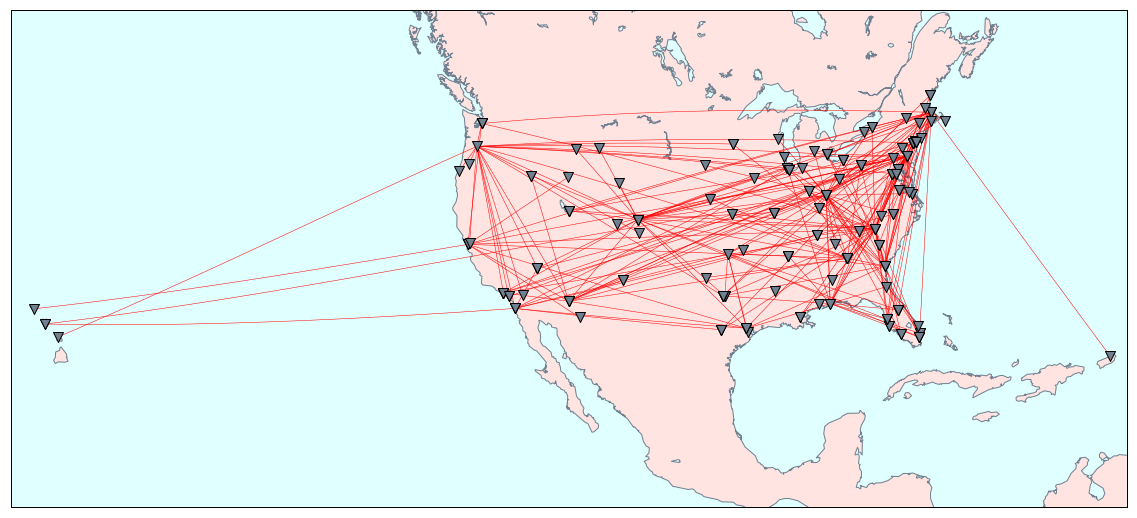

In [8]:
#map center
lat0 = np.mean(flights["Latitude"].astype(float))
lon0 = -112.0

fig = plt.figure(1, figsize=(20,20))
ax = fig.add_subplot(111)

#draw US map
m = Basemap(width=10100000,height=4500000,projection='lcc', resolution='l',lat_0=lat0, lon_0=lon0)
m.drawcoastlines(color="slategrey")
m.drawmapboundary(fill_color='lightcyan')
m.fillcontinents(color='mistyrose',lake_color='lightcyan')

#draw airport positions
x, y = m(list(airports["Longitude"].astype(float)), list(airports["Latitude"].astype(float)))
m.scatter(x, y, s=100, marker='v', color="slategray", edgecolor='k', zorder=100, ax=ax)

#draw routes
for index, row in routes.iterrows():
    try:
        arr_airport = row["Arrival_airport"]

        dep_airport_lon = float(row["Longitude"])
        dep_airport_lat = float(row["Latitude"])

        arr_airport_lat = float(airport_coordinates[arr_airport][0])
        arr_airport_lon = float(airport_coordinates[arr_airport][1])

        m.drawgreatcircle(dep_airport_lon, dep_airport_lat, arr_airport_lon, arr_airport_lat, linewidth=0.5, color='r')
    except:
        continue

Note, all the airports have at least one connection with another airport.

We may now wonder which airport is the most busy.

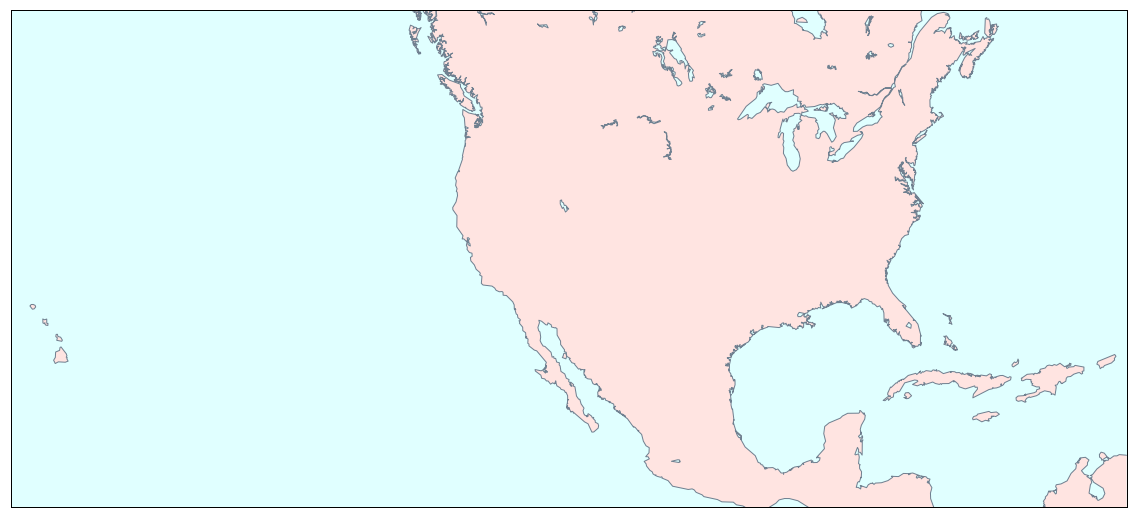

In [29]:
fig2 = plt.figure(2, figsize=(20,20))
ax2 = fig2.add_subplot(111)

m = Basemap(width=10100000,height=4500000,projection='lcc', resolution='l',lat_0=lat0, lon_0=lon0)
m.drawcoastlines(color="slategrey")
m.drawmapboundary(fill_color='lightcyan')
m.fillcontinents(color='mistyrose',lake_color='lightcyan')

# x, y = m(list(airports["Longitude"].astype(float)), list(airports["Latitude"].astype(float)))
# size = flights["Departure_Airport"].value_counts()
# m.scatter(x, y, s=size, marker='v', color="slategray", edgecolor='k', zorder=100, ax=ax)

for index, row in routes.iterrows():
    try:
        x = float(row["Longitude"])
        y = float(row["Latitude"])
        size = flights["Departure_Airport"].value_counts()[row["Departure_Airport"]]

        m.scatter(x, y, s=size, marker='v', color="slategray", edgecolor='k', zorder=100, ax=ax)
    except:
        continue

In [20]:
flights["Departure_Airport"].value_counts()[airport]

797

In [28]:
x

[7311461.538598237,
 7435784.409072811,
 6627604.91414545,
 5150176.1626436,
 5049070.34047911,
 4138265.3184676617,
 4459269.423248058,
 4564441.148994066,
 4152709.9198153173,
 4633855.366142333,
 4507201.965539158,
 5675884.961864576,
 5682343.032431883,
 5486145.601876444,
 8224048.626901889,
 7931999.177353868,
 8032200.023026262,
 8226588.773447182,
 8223479.840654702,
 7924053.127500294,
 8056334.106646805,
 8209726.763767647,
 7416444.821149701,
 7949937.949088779,
 7572118.115195947,
 7910225.546751995,
 310639.6781120477,
 213160.7853995571,
 431205.29300064873,
 6723658.376409166,
 4707685.257505161,
 5044315.837294398,
 7028980.027483071,
 7046643.559969117,
 7225418.333335012,
 7164787.381802389,
 7380733.077861099,
 7318183.793306192,
 6914311.471258543,
 7141329.062594203,
 8331405.469820397,
 8454498.530183347,
 8029781.681539001,
 8323270.900792904,
 7384649.076708613,
 7269524.497905543,
 6535123.74590199,
 6910956.186689264,
 6531151.6696531605,
 5321580.231864678,
 